# Linear Regression Model

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import math

In [46]:
ts = '1363'
sim_type = 'logit'

path = os.path.join(os.getcwd(), "simulation_data")
folder_path = os.path.join(path, "%s_%s_data" % (ts, sim_type))
listing = ts + "_" + sim_type + "_rawdata.csv"
path = os.path.join(folder_path, listing)
print(path)

df = pd.read_csv(path,header=None).T
df

/Users/saniyavaidya/Documents/4580_final_project/simulation_data/1363_logit_data/1363_logit_rawdata.csv


,0,1,2,3,4,5
0,-1.492976,1.0,0.576202,0.780220,0.880769,0.869231
1,-0.017112,1.0,0.588365,0.763956,0.844615,0.887179
2,2.487176,1.0,0.560144,0.750989,0.868462,0.871795
3,0.427624,1.0,0.589952,0.768571,0.873846,0.941026
4,-0.510547,1.0,0.589663,0.767033,0.836154,0.907692
...,...,...,...,...,...,...
495,0.210976,1.0,0.560817,0.749670,0.867692,0.920513
496,-0.869551,1.0,0.600625,0.790549,0.857692,0.910256
497,-0.742994,1.0,0.589423,0.762857,0.823846,0.838462
498,-1.722954,1.0,0.576010,0.746154,0.843077,0.910256


In [47]:
df = df.rename(columns={0: "alpha", 1: "gamma", 2: "% Men in J", 3: "% Men in M", 4: "% Men in S" , 5: "% Men in E"})
df.head()

,alpha,gamma,% Men in J,% Men in M,% Men in S,% Men in E
0,-1.492976,1.0,0.576202,0.780220,0.880769,0.869231
1,-0.017112,1.0,0.588365,0.763956,0.844615,0.887179
2,2.487176,1.0,0.560144,0.750989,0.868462,0.871795
3,0.427624,1.0,0.589952,0.768571,0.873846,0.941026
4,-0.510547,1.0,0.589663,0.767033,0.836154,0.907692


In [48]:
df['bias'] = (math.e**df['alpha']) / (1+math.e**df['alpha'])
df.head()

,alpha,gamma,% Men in J,% Men in M,% Men in S,% Men in E,bias
0,-1.492976,1.0,0.576202,0.780220,0.880769,0.869231,0.183475
1,-0.017112,1.0,0.588365,0.763956,0.844615,0.887179,0.495722
2,2.487176,1.0,0.560144,0.750989,0.868462,0.871795,0.923238
3,0.427624,1.0,0.589952,0.768571,0.873846,0.941026,0.605306
4,-0.510547,1.0,0.589663,0.767033,0.836154,0.907692,0.375065


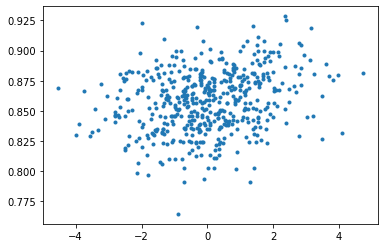

In [52]:
#plt.plot(df['bias'],df['% Men in J'],'.')
#plt.plot(df['alpha'],df['% Men in M'],'.')
#plt.plot(df['bias'],df['% Men in M'],'.')
plt.plot(df['alpha'],df['% Men in S'],'.')
#plt.plot(df['bias'],df['% Men in E'],'.')

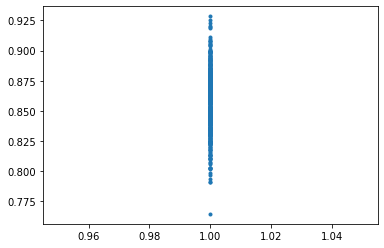

In [53]:
#plt.plot(df['gamma'],df['% Men in J'],".")
#plt.plot(df['gamma'],df['% Men in M'],".")
plt.plot(df['gamma'],df['% Men in S'],".")
#plt.plot(df['gamma'],df['% Men in E'],".")

In [54]:
df[['alpha','gamma']].head()

,alpha,gamma
0,-1.492976,1.0
1,-0.017112,1.0
2,2.487176,1.0
3,0.427624,1.0
4,-0.510547,1.0


In [55]:
model = sm.OLS(df['% Men in S'], sm.add_constant(df[['bias','gamma']])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             % Men in S   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     33.03
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           1.59e-08
Time:                        08:26:35   Log-Likelihood:                 1140.6
No. Observations:                 500   AIC:                            -2277.
Df Residuals:                     498   BIC:                            -2269.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
bias           0.0237      0.004      5.747      0.000       0.016       0.032
gamma          0.8460      0.002    362.771      0.000       0.841       0.851
==============================================================================
Omnibus:                        2.438   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.296   Jarque-Bera (JB):                2.448
Skew:                          -0.169   Prob(JB):                        0.294
Kurtosis:                       2.949   Cond. No.                         4.70
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
alpha_model = sm.OLS(df['% Men in S'], sm.add_constant(df['bias'])).fit()
alpha_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             % Men in S   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     33.03
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           1.59e-08
Time:                        08:28:41   Log-Likelihood:                 1140.6
No. Observations:                 500   AIC:                            -2277.
Df Residuals:                     498   BIC:                            -2269.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8460      0.002    362.771      0.000       0.841       0.851
bias           0.0237      0.004      5.747      0.000       0.016       0.032
==============================================================================
Omnibus:                        2.438   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.296   Jarque-Bera (JB):                2.448
Skew:                          -0.169   Prob(JB):                        0.294
Kurtosis:                       2.949   Cond. No.                         4.70
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

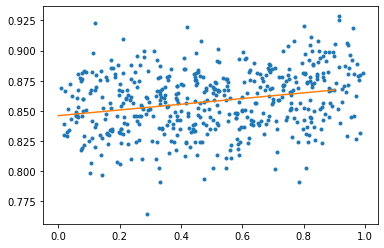

In [62]:
#plt.plot(df['alpha'],df['% Men in E'],".")
X = np.arange(0,1,0.1)
Y = alpha_model.params[0] + alpha_model.params[1]*X

plt.plot(df['bias'],df['% Men in S'],".")
plt.plot(X,Y)

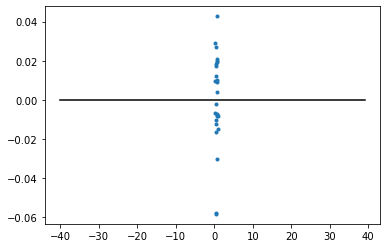

In [45]:
plt.plot(df['bias'],alpha_model.resid,".")
plt.plot(np.arange(-40,40,1),np.zeros(80),color='black')

In [217]:
model = sm.OLS(df['% Men in M'], sm.add_constant(df['gamma'])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             % Men in M   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 10 Dec 2023   Prob (F-statistic):                nan
Time:                        20:46:59   Log-Likelihood:                 106.23
No. Observations:                  40   AIC:                            -210.5
Df Residuals:                      39   BIC:                            -208.8
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
gamma          0.5628      0.003    206.786      0.000       0.557       0.568
==============================================================================
Omnibus:                        5.944   Durbin-Watson:                   2.411
Prob(Omnibus):                  0.051   Jarque-Bera (JB):                4.659
Skew:                           0.785   Prob(JB):                       0.0973
Kurtosis:                       3.573   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""